## Final Project Submission

Please fill out: 
* Student name: Gideon Ochieng Ochieng
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Analysis on the best airplanes for purchase
## 1 Business Understanding
### 1.1 Overview 

**Tujenge Limited** is a global travel platform that provides luxurious transportation and accommodation services to its clients, which include business owners and travelers seeking both convenience and comfort. It was started in the year 2002 with Gideon Ochieng as the founder. The company initially focused on helping businesses coordinate group travel across different states and countries. It facilitates transportaion and accomodations for business owners and also personns who travel for ammusement. Since it started, Tujenge LTD has expanded with at least `5 branches` in every continent due to its amaizing offers and services it provides for its customers. The company has served approximately 2 million clients worldwide, thanks to its excellent service and attractive offers.

### 1.2 Problem statement

With the increase of customers, the company has had problems getting planes ready for the users in time while using third party airlines. hence the company has decided to purchase and operate it own airplaces for both commercial and private enterprice. With our own airplanes we will be able to ensure that our customers dont get any delays which we face when using other airline. The critical issue now is determining which aircraft models are the safest and lowest-risk options for the company's expansion into the aviation industry.

### 1.3 Objectives
1. To clean the dataset
2. To anayze the dataset and come up with aactionalble insight
3. To create an interactive dashboard

### 1.4 Success matrix
- Being able to determining which aircraft are the lowest risk for the company
- Being able to translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase
- Creating an interactive dashboard
### 1.5 Assumptions
- The dataset accurately reflects aviation risk factors 
- The analysis assumes that aircraft models with lower accident frequency and severity are more suitable for purchase.
### 1.6 Limitations
- The dataset focuses on civil aviation accidents in the U.S. and international waters, which may not account for regional risks in areas where Tujenge operates.
- The data spans multiple decades, and technological advancements over time may impact the relevance of older incidents.

## 2. Data Understanding
The data is from the National Transportation Safety Board(NTSB) that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.


In [447]:
# Importing libraries for data manupulation and visualization
# Libraries for data manupulation
import pandas as pd
import numpy as np
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2.1 loading data
The data set is stored in the `data` folder as `Aviation_Data.csv` 

In [448]:
# reading the csv file and storing it in df DataFrame
df = pd.read_csv('./data/Aviation_Data.csv')

# Displaying the first 5 rows of the dataset
df.head()

c:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [449]:
# Checking on the number of rows and columns of the data set
df.shape

(90348, 31)

The data set has `90348` rows and `31` columns

* Checking the column names of the DataFrame

In [450]:
# view columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

* Getting an overview of the DataFrame

In [451]:
# Properties of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

* Checking on the sum of missing values in the dataframe

In [452]:
#sum of missing values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [453]:
# Calculate the percentage of missing values for each column
missing_per_nul = df.isnull().sum() / len(df) * 100
missing_per_nul

Event.Id                   1.614867
Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.382831
Airport.Name              41.570372
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.072564
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.447913
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6

* Checking if there in any duplicates in the dataset

In [454]:
#Summation of duplicates
df.duplicated().sum()


1390

* using list comprehension to get a list of columns which have more than 50% missing values

In [455]:
columns_high_missing = [name for name,i in missing_per_nul.items() if i > 50]
columns_high_missing

['Latitude',
 'Longitude',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

* Getting statistical summary for numerical columns


In [456]:
# Statistical summary
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


* Understanding non-numeric columns

In [457]:
# Summary for categorical columns
df.describe(include= ['object'])

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,90348,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,73659
unique,87951,71,88863,14782,27758,219,25592,27156,10375,24871,...,2,13,31,3,26,13590,4,12,17007,2923
top,20001212X19172,Accident,DCA22WA167,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,16317


* Unique instances in `Country` column

In [458]:
#checking for unique values in the country column
df['Country'].unique()

array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
       'Se

we can see that the dataset contains values from 219 countries worldwide though major water bodies like pacific ocean and caribbean sea. We also have nan described as a county

In [459]:
#checking for value counts for every country
df['Country'].value_counts()

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
Niger                 1
Eritrea               1
Cambodia              1
Chad                  1
BLOCK 651A            1
Name: Country, Length: 219, dtype: int64

United States is the leading country with airplane incidents

In [460]:
#df[df['Country'].value_counts().values >= 200].count

<AxesSubplot:>

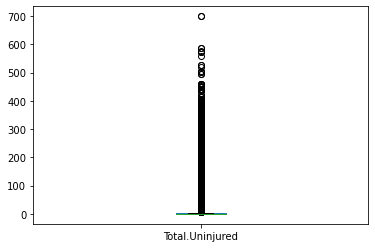

In [461]:
df['Total.Uninjured'].plot(kind='box')

In [462]:
df['Total.Uninjured'].value_counts()

0.0      29879
1.0      25101
2.0      15988
3.0       4313
4.0       2662
         ...  
325.0        1
230.0        1
260.0        1
251.0        1
414.0        1
Name: Total.Uninjured, Length: 379, dtype: int64

In [463]:
# # Ploting accidents over the years
# plt.figure(figsize=(10, 6))
# plt.hist(df['Event.Date'], bins=30)
# plt.title('Accidents Over Time')
# plt.xlabel('Year')
# plt.ylabel('Number of Accidents')
# plt.show()


## 3. Data Preparation


* Creating a copy of the main Dataframe 

In [464]:
main_df = df.copy()

* Removing duplicates for duplicates

In [465]:
#remove duplicates
df.drop_duplicates(keep= 'first', inplace=True)

* removing columns with high missing values

In [466]:
#dropping columns with many missing values
df = df.drop(columns=columns_high_missing)

In [467]:
# checking the columns names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

* Removing unwanted columns for the analysis

In [468]:
df= df.drop(columns=['Airport.Name','Airport.Code', 'Registration.Number', 'Publication.Date'])

* Cleaning the columns names

In [469]:
# replacing "." with "_"
df.columns = df.columns.str.replace('.','_')
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_damage', 'Make',
       'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status'],
      dtype='object')

* Dealing with missing values

In [470]:
df.isna().sum()

Event_Id                     69
Investigation_Type            0
Accident_Number              69
Event_Date                   69
Location                    121
Country                     295
Injury_Severity            1069
Aircraft_damage            3263
Make                        132
Model                       161
Amateur_Built               171
Number_of_Engines          6153
Engine_Type                7146
Purpose_of_flight          6261
Total_Fatal_Injuries      11470
Total_Serious_Injuries    12579
Total_Minor_Injuries      12002
Total_Uninjured            5981
Weather_Condition          4561
Broad_phase_of_flight     27234
Report_Status              6450
dtype: int64

In [471]:
df[df['Event_Id'].isna()]

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
64030,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69843,NaN,14-06-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74420,NaN,03-11-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74946,NaN,24-02-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75894,NaN,02-02-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89440,NaN,02-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89492,NaN,05-08-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89763,NaN,08-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89943,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* droping all rows with NaN value in Event_Id column

In [472]:
df.dropna(subset=['Event_Id'], inplace=True)
df.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Injury_Severity            1000
Aircraft_damage            3194
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines          6084
Engine_Type                7077
Purpose_of_flight          6192
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
dtype: int64

Broad_phase_of_flight shows at which stage of the flight the incident occured and its not that eccential for our analysis

In [473]:
#checking for count values instances in Broad_phase_of_flight column
df['Broad_phase_of_flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad_phase_of_flight, dtype: int64

In [474]:
# dropping Broad_phase_of_flight column
df.drop(columns=['Broad_phase_of_flight'], inplace= True)

* Injury_Severity column
The column indicates the level or degree of injuries resulting from each aviation accident or incident.

In [475]:
#unique values in Injury_Severity 
df['Injury_Severity'].value_counts()[0:30]

Non-Fatal      67357
Fatal(1)        6167
Fatal           5262
Fatal(2)        3711
Incident        2219
Fatal(3)        1147
Fatal(4)         812
Fatal(5)         235
Minor            218
Serious          173
Fatal(6)         161
Unavailable       96
Fatal(7)          56
Fatal(8)          51
Fatal(10)         32
Fatal(9)          18
Fatal(14)         11
Fatal(11)         10
Fatal(13)          9
Fatal(12)          8
Fatal(20)          5
Fatal(15)          5
Fatal(18)          5
Fatal(23)          4
Fatal(25)          4
Fatal(34)          3
Fatal(19)          3
Fatal(16)          3
Fatal(17)          3
Fatal(52)          2
Name: Injury_Severity, dtype: int64

In [476]:
#Imputing missing values with "Unknown"
df['Injury_Severity'].fillna('Unknown', inplace=True)
df['Injury_Severity'].value_counts()[0:30]

Non-Fatal      67357
Fatal(1)        6167
Fatal           5262
Fatal(2)        3711
Incident        2219
Fatal(3)        1147
Unknown         1000
Fatal(4)         812
Fatal(5)         235
Minor            218
Serious          173
Fatal(6)         161
Unavailable       96
Fatal(7)          56
Fatal(8)          51
Fatal(10)         32
Fatal(9)          18
Fatal(14)         11
Fatal(11)         10
Fatal(13)          9
Fatal(12)          8
Fatal(18)          5
Fatal(20)          5
Fatal(15)          5
Fatal(25)          4
Fatal(23)          4
Fatal(17)          3
Fatal(16)          3
Fatal(19)          3
Fatal(34)          3
Name: Injury_Severity, dtype: int64

* The Injury_Severity has multiple instances if fatal according to fatality level. 

In [477]:
# replacing all instaces of 'Fatal()' with just 'Futal'
df['Injury_Severity'] = df['Injury_Severity'].map(lambda x: 'Fatal' if 'Fatal' in str(x) else x)
df['Injury_Severity'].value_counts()

Fatal          85183
Incident        2219
Unknown         1000
Minor            218
Serious          173
Unavailable       96
Name: Injury_Severity, dtype: int64

* adding unavailable to Unknown

In [478]:
#using replace method to add unavailable to unknown
df['Injury_Severity'] = df['Injury_Severity'].str.replace('Unavailable','Unknown')
df['Injury_Severity'].value_counts()

Fatal       85183
Incident     2219
Unknown      1096
Minor         218
Serious       173
Name: Injury_Severity, dtype: int64

* Aircraft_damage 

In [479]:
df['Aircraft_damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft_damage, dtype: int64

In [480]:
#summation of NuN values in Aircraft_damage
df['Aircraft_damage'].isna().sum()

3194

In [481]:
df['Aircraft_damage'].fillna('Unknown', inplace=True)
df['Aircraft_damage'].value_counts()

Substantial    64148
Destroyed      18623
Unknown         3313
Minor           2805
Name: Aircraft_damage, dtype: int64

* Cleaning `Make` column

In [482]:
df['Make'].value_counts()

Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
                     ...  
Joe Underwood            1
FOSTER WILLIAM D         1
ROBERT SNYDER            1
BUTCHER RUSSELL A        1
BINS TOM                 1
Name: Make, Length: 8237, dtype: int64

In [483]:
df.dropna(subset=['Make'], inplace=True)

In [484]:
df['Make'] = df['Make'].map(lambda x: x.capitalize() if isinstance(x, str) else x)
df['Make'].value_counts()

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
                                  ...  
Sackett                               1
Stan g. hallam                        1
Bielawa                               1
Bae systems (operations) limit        1
Wing aircraft co.                     1
Name: Make, Length: 7587, dtype: int64

In [485]:
#rechecking missing values
df.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     225
Injury_Severity               0
Aircraft_damage               0
Make                          0
Model                        49
Amateur_Built               100
Number_of_Engines          6035
Engine_Type                7026
Purpose_of_flight          6150
Total_Fatal_Injuries      11394
Total_Serious_Injuries    12500
Total_Minor_Injuries      11922
Total_Uninjured            5901
Weather_Condition          4454
Report_Status              6349
dtype: int64

* Injuries

In [495]:
df.loc[df['Total_Serious_Injuries'].isna(), 'Aircraft_damage'].value_counts()

Substantial    9421
Destroyed      2316
Minor           440
Unknown         323
Name: Aircraft_damage, dtype: int64

In [496]:
#df.dropna(subset=['Total_Serious_Injuries'], inplace=True)
df[df['Total_Uninjured'].isna()]

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Report_Status,Year
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,Cessna,172M,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,1974
293,20020917X02136,Accident,FTW82FRA16,1982-02-11,"BRENHAM, TX",United States,Fatal,Substantial,Piper,PA-60-602P,...,2.0,Reciprocating,Personal,1.0,NaN,NaN,NaN,VMC,Probable Cause,1982
593,20080417X00504,Accident,MIA08CA076,1982-03-16,"MOBILE, AL",United States,Fatal,Substantial,Beech,C24R,...,1.0,Reciprocating,Unknown,1.0,NaN,NaN,NaN,IMC,Probable Cause,1982
1970,20020917X02985,Accident,CHI82DA251,1982-07-16,"WASHINGTON ISLAND, WI",United States,Fatal,Destroyed,Cessna,172P,...,1.0,Reciprocating,Personal,NaN,1.0,3.0,NaN,VMC,Probable Cause,1982
2099,20020917X02847,Accident,ATL82FA212,1982-07-25,"LOUISBURG, NC",United States,Fatal,Destroyed,Cessna,182A,...,1.0,Reciprocating,Skydiving,4.0,1.0,NaN,NaN,VMC,Probable Cause,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63892,20080229X00252,Accident,MIA08WA058,2007-12-26,"OCUMARE DEL TUY, VENEZUELA",Venezuela,Fatal,Substantial,Cessna,T210L,...,NaN,NaN,Personal,NaN,NaN,1.0,NaN,VMC,Foreign,2007
63899,20080108X00030,Accident,CHI08FA055,2007-12-27,"Traverse City, MI",United States,Fatal,Destroyed,Cessna,310R,...,2.0,Reciprocating,Personal,1.0,1.0,NaN,NaN,IMC,Probable Cause,2007
63902,20080117X00071,Accident,LAX08WA045,2007-12-29,"WESTGATE BRIDGE, AUSTRALIA",Australia,Fatal,Substantial,Robinson,R-44,...,NaN,NaN,Instructional,1.0,1.0,NaN,NaN,VMC,Foreign,2007
63907,20071231X02014,Accident,DFW08FA053,2007-12-29,"Venice, LA",United States,Fatal,Destroyed,Bell,206L1,...,1.0,Turbo Shaft,NaN,1.0,1.0,2.0,NaN,IMC,Probable Cause,2007


In [493]:
df['Aircraft_damage'].value_counts()

Substantial    64124
Destroyed      18612
Unknown         3295
Minor           2795
Name: Aircraft_damage, dtype: int64

from my analysis i have discoverd that when an aircraft has Substantial or minor damages the are no fatalaties, only when an aeroplane is destroyed is when we have fatalities.
I have decided to fill all missing values in `Total_Fatal_Injuries,	Total_Serious_Injuries,	Total_Minor_Injuries and Total_Uninjured `with `zero`, this is because they only recorded where there was data to recored and left the ones with no data

In [498]:
#Filling missing values in Total_Fatal_Injuries,	Total_Serious_Injuries,	Total_Minor_Injuries and Total_Uninjured

df[["Total_Fatal_Injuries",	'Total_Serious_Injuries',	'Total_Minor_Injuries', 'Total_Uninjured']] = df[["Total_Fatal_Injuries",	'Total_Serious_Injuries',	'Total_Minor_Injuries', 'Total_Uninjured']].fillna(0)

In [499]:
#rechecking missing values
df.isna().sum()

Event_Id                     0
Investigation_Type           0
Accident_Number              0
Event_Date                   0
Location                    52
Country                    225
Injury_Severity              0
Aircraft_damage              0
Make                         0
Model                       49
Amateur_Built              100
Number_of_Engines         6035
Engine_Type               7026
Purpose_of_flight         6150
Total_Fatal_Injuries         0
Total_Serious_Injuries       0
Total_Minor_Injuries         0
Total_Uninjured              0
Weather_Condition         4454
Report_Status             6349
Year                         0
dtype: int64

* Number_of_Engines 

In [500]:
df['Number_of_Engines'].value_counts()

1.0    69569
2.0    11078
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number_of_Engines, dtype: int64

Analysing data where aircraft has zero engine

In [503]:
df[df['Number_of_Engines']==0.0].head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Report_Status,Year
62,20020917X02247,Accident,LAX82DVG13,1982-01-09,"CALISTOGA, CA",United States,Fatal,Substantial,Schleicher,ASW 20,...,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause,1982
247,20020917X02190,Accident,LAX82DA098,1982-02-06,"GLENDALE, AZ",United States,Fatal,Substantial,Raven,S-55A,...,0.0,Unknown,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,1982
353,20020917X02298,Accident,LAX82FUJ28,1982-02-19,"PHOENIX, AZ",United States,Fatal,Substantial,Balloon works,FIREFLY,...,0.0,Unknown,Personal,0.0,0.0,0.0,3.0,VMC,Probable Cause,1982
433,20020917X01824,Accident,CHI82DA076,1982-02-27,"CINCINNATI, OH",United States,Fatal,Substantial,Barnes,FIREFLY-7,...,0.0,Unknown,Personal,0.0,1.0,1.0,2.0,VMC,Probable Cause,1982
436,20020917X02181,Accident,LAX82DA089,1982-02-28,"NAPA, CA",United States,Fatal,Destroyed,Barnes,BALLOON AX7,...,0.0,Unknown,Unknown,0.0,0.0,1.0,4.0,VMC,Probable Cause,1982


Crafts with no engines are aircrafts that depend on atmospheric presure and air like gliders and hot air ballons

In [507]:
#Number_of_Engines column with null value
df[df['Number_of_Engines'].isna()][40:60]

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Report_Status,Year
6067,20001214X44340,Accident,NYC83LA229,1983-08-29,"JULIAN, PA",United States,Fatal,Substantial,Burkhart grob,FLUGZEUGBAU G103,...,NaN,Unknown,Instructional,0.0,0.0,0.0,2.0,VMC,Probable Cause,1983
6149,20001214X44509,Accident,DEN83LA210,1983-09-04,"DURANGO, CO",United States,Fatal,Substantial,Schweizer,SGS 2-33A,...,NaN,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause,1983
6239,20001214X44550,Accident,FTW83LA440,1983-09-11,"SANTA FE, NM",United States,Fatal,Substantial,Raven,S-55A,...,NaN,Unknown,Personal,0.0,0.0,0.0,3.0,VMC,Probable Cause,1983
6298,20001214X44599,Accident,LAX83LA447,1983-09-17,"FREMONT, CA",United States,Fatal,Substantial,Schweizer,SGS 2-33A,...,NaN,Unknown,Instructional,0.0,0.0,1.0,0.0,VMC,Probable Cause,1983
6315,20001214X44514,Accident,DEN83LA218,1983-09-18,"PARK CITY, UT",United States,Fatal,Substantial,Schweizer,SGS 1-34,...,NaN,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause,1983
6370,20001214X44658,Accident,MKC83LA228,1983-09-24,"FORT MADISON, IA",United States,Fatal,Unknown,Balloon works,FIREFLY 6,...,NaN,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,Probable Cause,1983
6382,20001214X44410,Accident,ATL83FA377,1983-09-24,"BATTLEBORO, NC",United States,Fatal,Substantial,Schweizer,SGS 1-23,...,NaN,Unknown,Personal,1.0,0.0,0.0,0.0,VMC,Probable Cause,1983
6411,20001214X44657,Accident,MKC83LA227,1983-09-29,"WARRENSBURG, MO",United States,Fatal,Unknown,Schweizer,SGS-2-33A,...,NaN,Unknown,Personal,0.0,1.0,0.0,1.0,VMC,Probable Cause,1983
6518,20001214X44778,Accident,CHI84LA015,1983-10-08,"WYOMING, MI",United States,Fatal,Substantial,Adams,AB,...,NaN,Unknown,Personal,0.0,1.0,0.0,5.0,VMC,Probable Cause,1983
6522,20001214X44780,Accident,CHI84LA018,1983-10-09,"DORR, MI",United States,Fatal,Unknown,Balloon works,FIREFLY 7,...,NaN,Unknown,Personal,0.0,1.0,0.0,3.0,VMC,Probable Cause,1983


Dropping rows with zero and null number of engines 

In [509]:
#dropping rows with null number of engines
df.dropna(subset=['Number_of_Engines'], inplace= True)

#dropping rows with 0 number of engines

df = df[df['Number_of_Engines'] != 0]

In [510]:
#rechecking missing values
df.isna().sum()

Event_Id                     0
Investigation_Type           0
Accident_Number              0
Event_Date                   0
Location                    20
Country                    215
Injury_Severity              0
Aircraft_damage              0
Make                         0
Model                       37
Amateur_Built               20
Number_of_Engines            0
Engine_Type               2499
Purpose_of_flight         3242
Total_Fatal_Injuries         0
Total_Serious_Injuries       0
Total_Minor_Injuries         0
Total_Uninjured              0
Weather_Condition         1565
Report_Status             3544
Year                         0
dtype: int64

* Engine_Type 

In [511]:
#checking value count
df['Engine_Type'].value_counts()

Reciprocating      69012
Turbo Shaft         3531
Turbo Prop          3326
Turbo Fan           2380
Turbo Jet            695
Unknown               92
Geared Turbofan       11
Electric               8
None                   7
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine_Type, dtype: int64

In [513]:
#Engine_Type column with null value
df[df['Engine_Type'].isna()].head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Report_Status,Year
45307,20001211X11495,Accident,NYC99WA028,1998-11-26,"HAMILTON, CANADA",Canada,Fatal,Substantial,Cessna,208B,...,1.0,NaN,Unknown,0.0,0.0,0.0,1.0,IMC,Foreign,1998
47876,20001212X20521,Accident,LAX00LA105,2000-02-18,"ELKO, NV",United States,Fatal,Substantial,Ayres,NaN,...,1.0,NaN,Positioning,0.0,0.0,1.0,0.0,VMC,Probable Cause,2000
49749,20030930X01615,Accident,IAD01LA110,2000-11-26,"Boston, MA",United States,Fatal,Unknown,Boeing,767,...,2.0,NaN,NaN,0.0,2.0,0.0,0.0,NaN,Probable Cause,2000
52365,20020412X00509,Accident,ATL02LA073,2002-04-04,"PENSACOLA, FL",United States,Fatal,Substantial,Cessna,172P,...,1.0,NaN,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,2002
53133,20020805X01300,Accident,CHI02FA215,2002-07-25,"Marble Hill, MO",United States,Fatal,Destroyed,Piper,PA-30,...,2.0,NaN,Personal,1.0,0.0,0.0,0.0,VMC,Probable Cause,2002


In [515]:
#adding null values with unknown in Engine type
df['Engine_Type'].fillna('Unknown', inplace= True)

#performing value count
df['Engine_Type'].value_counts()

c:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Reciprocating      69012
Turbo Shaft         3531
Turbo Prop          3326
Unknown             2591
Turbo Fan           2380
Turbo Jet            695
Geared Turbofan       11
Electric               8
None                   7
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine_Type, dtype: int64

In [516]:
#rechecking missing values
df.isna().sum()

Event_Id                     0
Investigation_Type           0
Accident_Number              0
Event_Date                   0
Location                    20
Country                    215
Injury_Severity              0
Aircraft_damage              0
Make                         0
Model                       37
Amateur_Built               20
Number_of_Engines            0
Engine_Type                  0
Purpose_of_flight         3242
Total_Fatal_Injuries         0
Total_Serious_Injuries       0
Total_Minor_Injuries         0
Total_Uninjured              0
Weather_Condition         1565
Report_Status             3544
Year                         0
dtype: int64

* Purpose_of_flight


In [518]:
df.dropna(subset=['Purpose_of_flight'], inplace=True)

<ipython-input-518-41aed1f2d91f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Purpose_of_flight'], inplace=True)


In [538]:
#rechecking missing values
df.isna().sum()

Event_Id                  0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Injury_Severity           0
Aircraft_damage           0
Make                      0
Model                     0
Amateur_Built             0
Number_of_Engines         0
Engine_Type               0
Purpose_of_flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Report_Status             0
Year                      0
dtype: int64

* Report_Status <br>
I will fill null values in this column with No Status as a filler

In [521]:
df['Report_Status'].fillna('No status', inplace= True)

c:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


* Weather_Condition 

In [523]:
df['Weather_Condition'].value_counts()

VMC    71628
IMC     5344
UNK      588
Unk       95
Name: Weather_Condition, dtype: int64

In [526]:
#dropping Weather_condition column

df = df.drop('Weather_Condition', axis= 1)

In [530]:
df.dropna(subset=['Model'], inplace=True)

* Amateur_Built

In [532]:
df['Amateur_Built'].value_counts()

No     70211
Yes     8066
Name: Amateur_Built, dtype: int64

In [537]:
#dropping rows with null in Amateur_Built column
df.dropna(subset=['Amateur_Built', 'Country', 'Location'], inplace= True)

* Working on dates

In [489]:
#checking on the date format
df['Event_Date'].head()

0    1948-10-24
1    1962-07-19
2    1974-08-30
3    1977-06-19
4    1979-08-02
Name: Event_Date, dtype: object

* Factor engineering `Year` Column

In [490]:
#Adding `Year` column
df['Year'] =  df['Event_Date'].apply(lambda x: x[0:4])
df['Year'].head()

0    1948
1    1962
2    1974
3    1977
4    1979
Name: Year, dtype: object

#### number of passengers in every aeroplane
we can get the number of passengers by adding Total_Fatal_Injuries,	Total_Serious_Injuries,	Total_Minor_Injuries and Total_Uninjured 

In [539]:
#creating a new colunm `number_of_passangers`
df['Number_of_passangers'] = df['Total_Fatal_Injuries'] + df['Total_Minor_Injuries'] + df['Total_Serious_Injuries'] + df['Total_Uninjured']

## 4 Data Analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78049 entries, 0 to 90345
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                78049 non-null  object 
 1   Investigation_Type      78049 non-null  object 
 2   Accident_Number         78049 non-null  object 
 3   Event_Date              78049 non-null  object 
 4   Location                78049 non-null  object 
 5   Country                 78049 non-null  object 
 6   Injury_Severity         78049 non-null  object 
 7   Aircraft_damage         78049 non-null  object 
 8   Make                    78049 non-null  object 
 9   Model                   78049 non-null  object 
 10  Amateur_Built           78049 non-null  object 
 11  Number_of_Engines       78049 non-null  float64
 12  Engine_Type             78049 non-null  object 
 13  Purpose_of_flight       78049 non-null  object 
 14  Total_Fatal_Injuries    78049 non-null